[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/09_queuing/queuing.ipynb)

### Simple queuing theory simulation, M/M/1 queue  
Single server, single queue

Adapted from notes by Sara Billey at U. Washington

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
a = 1 # average number of arrivals per minute 
b = 1.5 # average number of people served per minute (reduce from 1.5 to 1.1 or 0.95)
ncust = 10000 # number of customers 

Notation:

`at` = arrival time of a person joining the queue

`st` = service time once they reach the front

`ft` = finish time after waiting and being served

In [3]:
# Initialize arrays 
at = np.zeros((ncust, 1))
ft = np.zeros((ncust, 1))
# Generate random arrival times assuming Poisson process:
r = np.random.uniform(low=0., high=1., size=(ncust, 1))
iat = -(1./a) * np.log(r) # generate inter-arrival times, exponential distribution
at[0] = iat[0] # arrival time of first customer
for i in range(1, ncust): 
    at[i] = at[i-1] + iat[i]
    
# Generate random service times for each customer:
r = np.random.uniform(low=0., high=1., size=(ncust, 1))
st =  -(1./b) * np.log(r) # service time for each customer, follow an expoential distribution
# Compute time each customer finishes:
ft[0] = at[0] + st[0]
for i in range(1, ncust): 
    # compute finish time for each customer as the larger of
    # arrival time plus service time (if no wait)
    # finish time of previous customer plus service time (if wait)
    ft[i] = np.maximum(at[i] + st[i], ft[i-1] + st[i])
    
total_time = ft - at # total time spent by each customer
wait_time = total_time - st # time spent waiting before being served
ave_service_time = np.sum(st)/np.float32(ncust)
ave_wait_time = np.sum(wait_time)/np.float32(ncust)
ave_total_time = np.sum(total_time)/np.float32(ncust)
print('ave_service_time = ', ave_service_time)
print('ave_wait_time = ', ave_wait_time)
print('ave_total_time = ', ave_total_time)

ave_service_time =  0.6628517327424456
ave_wait_time =  1.3067927909973562
ave_total_time =  1.9696445237398017


In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

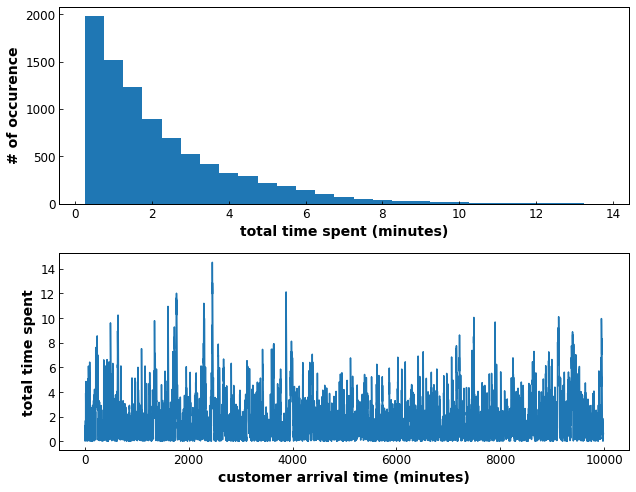

In [5]:
# Compare simulation to Poisson distribution 
fig, axs = plt.subplots(2,1,figsize=(9,7), tight_layout=True)

# Plot histogram of waiting times
axs[0].hist(total_time, bins=np.arange(0.25, np.floor(np.max(total_time))+0.25, 0.5))
axs[0].set(ylabel = '# of occurence')
axs[0].set(xlabel = 'total time spent (minutes)')

# Plot total time
axs[1].plot(at, total_time)
axs[1].set(xlabel = 'customer arrival time (minutes)')
axs[1].set(ylabel = 'total time spent')

plt.show()